# Keras MNIST 手寫數字辨識資料集

## 下載MNIS資料

匯入Keras相關模組

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

匯入mnist模組

In [ ]:
from keras.datasets import mnist

下載及讀取mnist資料集

In [ ]:
(X_train_image, y_train_label), \
(X_test_image, y_test_label) = mnist.load_data()

查看資料集筆數

In [105]:
print('train data=', len(X_train_image))
print(' test data=', len(X_test_image))

train data= 60000
 test data= 10000


## 查看訓練資料 

查看訓練資料筆數

In [ ]:
print('X_train_image:', X_train_image.shape)
print('y_train_label:', y_train_label.shape)

定義影像顯示函數

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

顯示第0筆影像

In [ ]:
plot_image(X_train_image[0])

顯示第0筆label

In [ ]:
y_train_label[0]

## 查看多筆訓練資料

建立plotplot_images_labels_prediction()函數

In [107]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title='label' + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

顯示訓練資料10筆

In [ ]:
plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

顯示測試資料10筆

In [ ]:
plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

In [ ]:
print('X_train_image:', X_train_image.shape)
print('y_train_label:', y_train_label.shape)

In [ ]:
x_Train = X_train_image.reshape(60000, 784).astype('float32')
x_Test = X_test_image.reshape(10000, 784).astype('float32')

In [ ]:
print('x_Train:', x_Train.shape)
print('x_Test:', x_Test.shape)

In [ ]:
X_train_image[0]

In [ ]:
x_Train[0]

In [ ]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [ ]:
x_Train_normalize[0]

In [ ]:
x_Test_normalize[0]

In [ ]:
y_train_label[:5]

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [ ]:
y_TrainOneHot[:5]

In [ ]:
y_TestOneHot[:5]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [ ]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [ ]:
print(model.summary())

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [ ]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_TrainOneHot, validation_split=0.2,
                        epochs=10, batch_size=200, verbose=2)

In [110]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 49us/step

accuracy= 0.9767


In [ ]:
prediction=model.predict_classes(x_Test)

In [ ]:
prediction

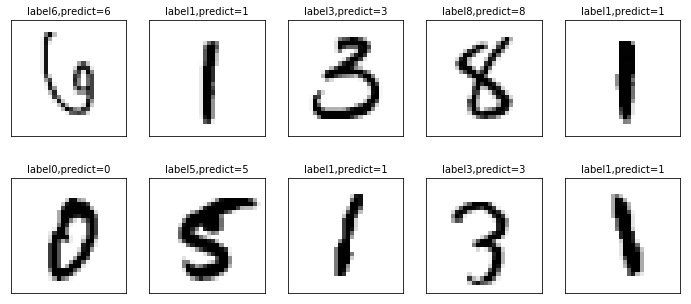

In [109]:
plot_images_labels_prediction(X_test_image, y_test_label,
                             prediction, idx=341)